# Tatajuba analysis on *Campylobacter* and *Bordetella*

In [2]:
library(dendextend)
library(colorspace)
library(scales) ## alpha() transparency
library(gplots)
library(RColorBrewer)

In [5]:
a<-read.table("2103.outdir_campylobacter/per_sample_average_length.csv", header=T, check.names = F) # check.names replaces backslash by "."
x<-t(as.matrix(a[,4:length(a)]))
length(a)
rownames(x)<-gsub ("_1.fastq.gz","",rownames(x))
rownames(x)<-gsub (".*/","",rownames(x))

names<-read.table("2103.outdir_campylobacter/41598_2016_BFsrep38303_MOESM1_ESM.csv",header=T, sep=",")
xnames<-names$Isolate.name
names(xnames)<-names$ERR
xnames["reference"] <- "reference NC_017280.1"
rownames(x) <- xnames[rownames(x)] 
length(rownames(x))
calen <- x
colnames(calen) <- a$location

[1] 104

[1] 101

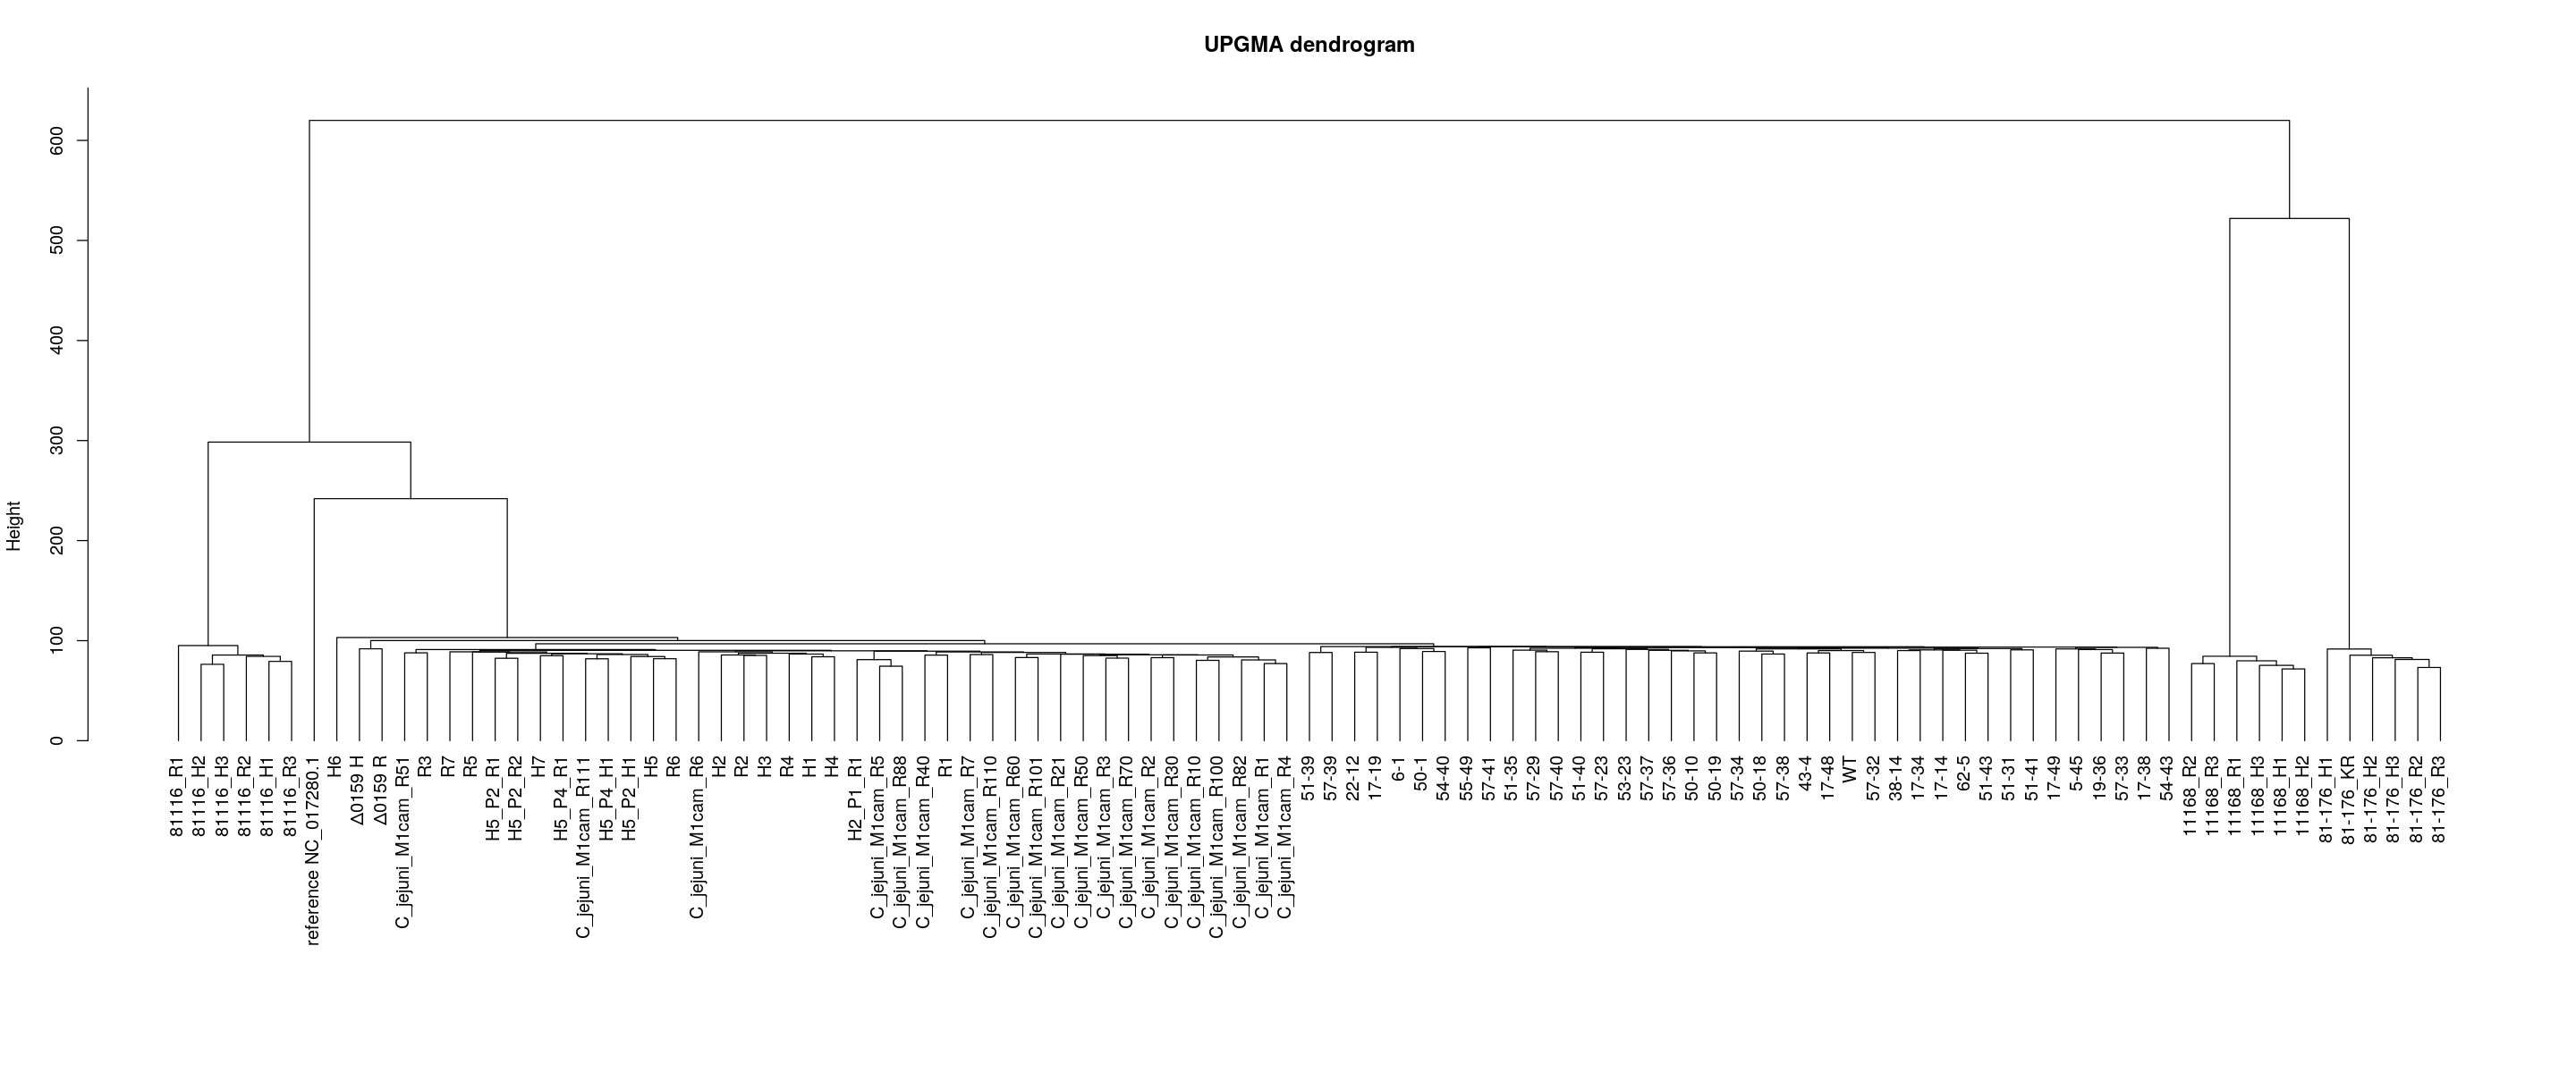

In [6]:
options(repr.plot.width=24, repr.plot.height=10) ; par(oma=c(0,0,0,0))
cls <- hclust(dist(x), method="average") 
plot (cls, hang=-0.01, main="UPGMA dendrogram", xlab="",sub="")

In [8]:
a<-read.table("2103.outdir_bordetella/per_sample_average_length.csv", header=T, check.names = F) # check.names replaces backslash by "."
x<-t(as.matrix(a[,4:length(a)]))
rownames(x)<-gsub ("_1.fastq.gz","",rownames(x))
rownames(x)<-gsub (".*/","",rownames(x)) ## remove path from filenames
rownames(x)<-gsub ("reference","reference NC_002929.2 pertussis_Tohama_I",rownames(x))
# add bioproject information to pertussis 
rownames(x)<-gsub ("_pertussis_France",  "_PRJEB42353_pertussis", rownames(x))
rownames(x)<-gsub ("_Ontario_pertussis", "_PRJNA356412_pertussis", rownames(x))
rownames(x)<-gsub ("_pertussis_Israel",  "_PRJNA348407_pertussis", rownames(x))
rownames(x)<-gsub ("_Illumina_MiSeq_paired_end_sequencing_Raw_reads_Sequencing_of_the_non-hemolytic_clone_of_B._pertussis_Tohama_I_delta-BP3063_mutant",
                   "_PRJEB38438_pertussis",rownames(x))

In [9]:
clst <- as.dendrogram(hclust(dist(x), method="average"))
bolen <- x
colnames(bolen) <- a$location

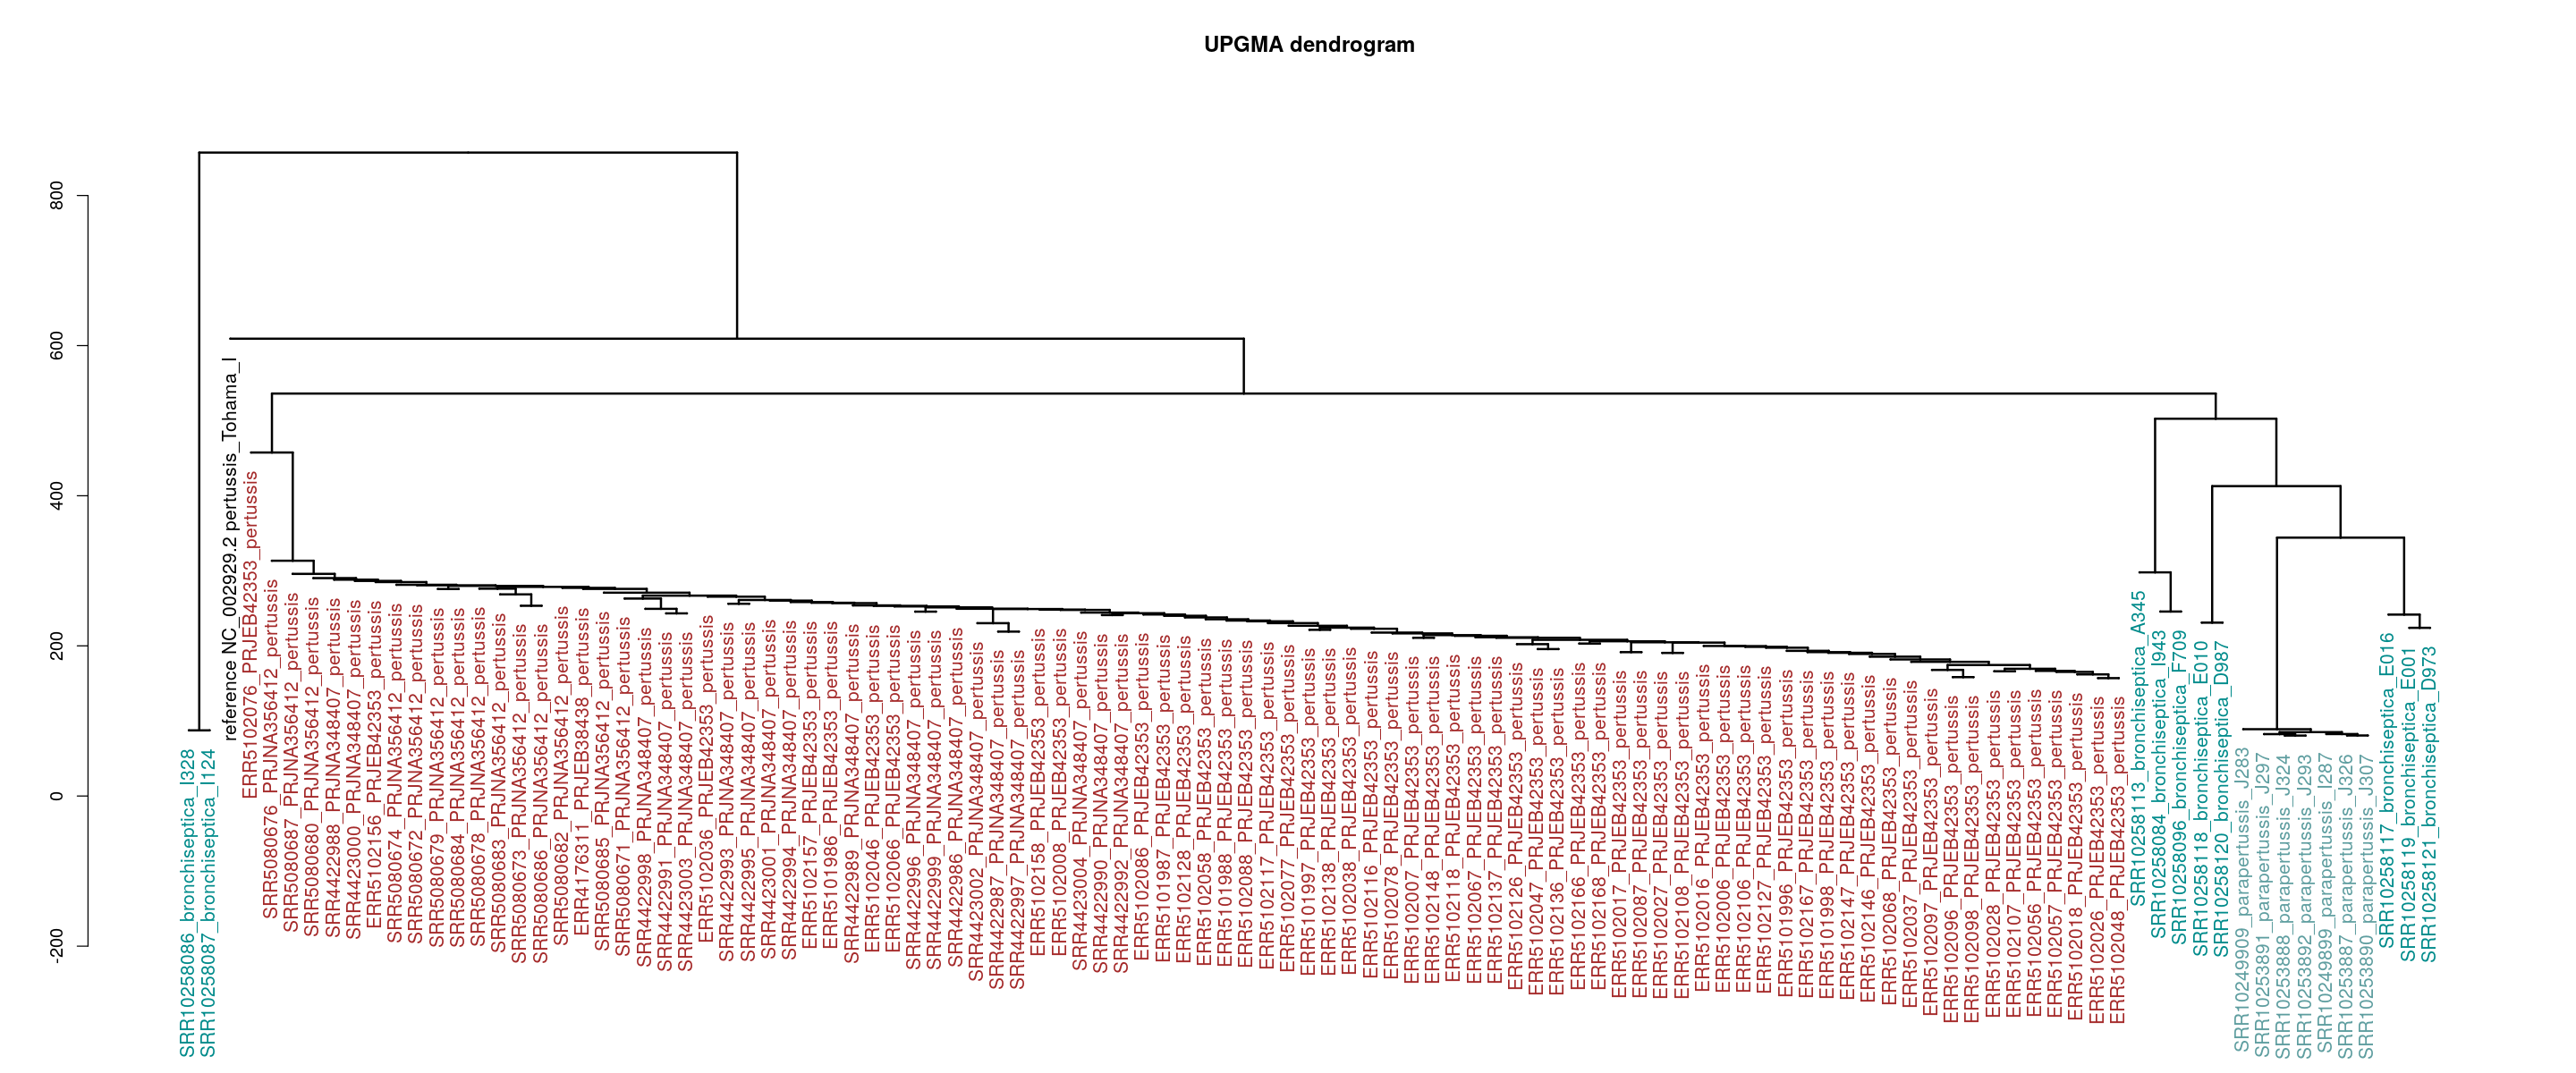

In [10]:
## write.csv (rownames(x), "bordetella.names") ## gawk -F '"' '{print $4}' bordetella.names | sort > 004.bordetella/accession_files/bordetella_samples.csv
options(repr.plot.width=24, repr.plot.height=10) ; par(oma=c(0,0,0,0))
dend <- clst
my_col_table <- c("black", "brown", "cadetblue", "darkcyan")
col_to_use <- rep(1,length(rownames(x)))
col_to_use[grepl("_pertussis", rownames(x))] <- 2
col_to_use[grepl("_parapertussis", rownames(x))] <- 3
col_to_use[grepl("_bronchiseptica", rownames(x))] <- 4
#labels_colors(dend) <- colorspace::rainbow_hcl(4, c = 50, l  = 20)[ col_to_use[order.dendrogram(dend)]] ## reorder based on dendrogram
labels_colors(dend) <- my_col_table[ col_to_use[order.dendrogram(dend)]]

dend <- dend %>% hang.dendrogram(hang_height = 0.01) %>% set("branches_lwd", 2)  %>% set("labels_cex", 1.05)

plot (dend, main="UPGMA dendrogram", xlab="",sub="", ylim=c(-180, 900))

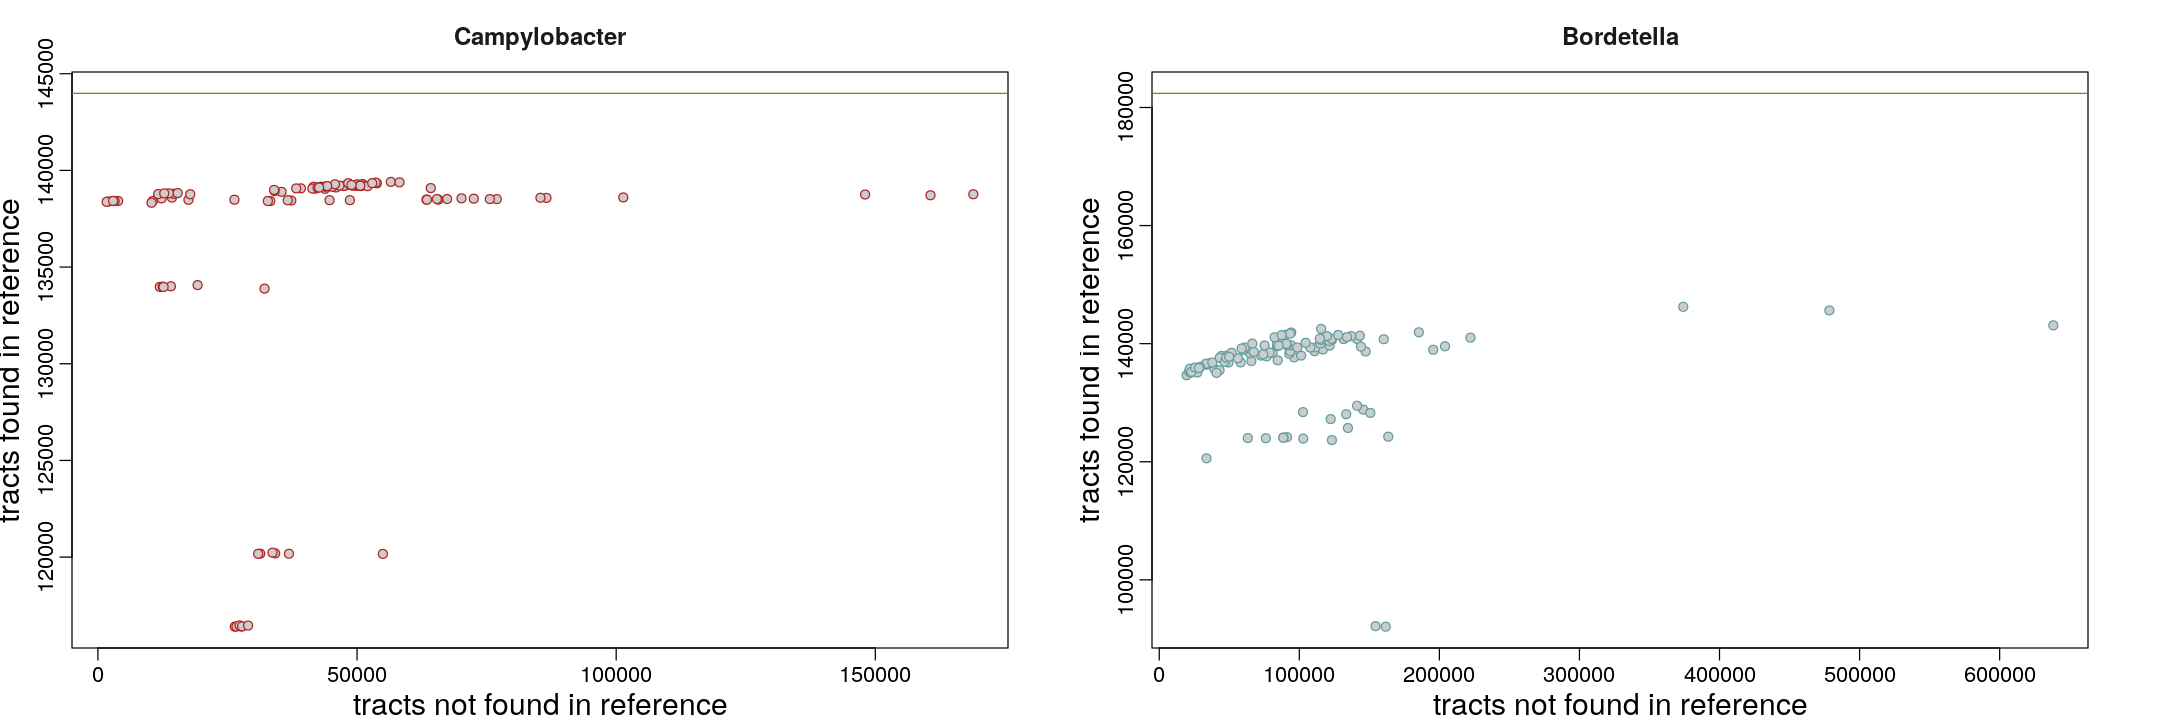

In [11]:
a1 <- read.table("2103.outdir_campylobacter/not_found_in_ref.txt")
x1 <- read.table("2103.outdir_campylobacter/tract_list.csv", header=T)
x1 <- length(x1[,1])
a2 <- read.table("2103.outdir_bordetella/not_found_in_ref.txt")
x2 <- read.table("2103.outdir_bordetella/tract_list.csv", header=T)
x2 <- length(x2[,1])

options(repr.plot.width=18, repr.plot.height=6)
options(scipen=4); # controls how easily it used scientific notation

par (font=2, cex=1.2, col.main="gray10", cex.axis=1.1, cex.lab=1.5,tcl=-0.5, mgp=c(2,0.6,0), mar=c(3,3,3,3));
layout(matrix(1:2,ncol=2,nrow=1, byrow=F));


plot(a1$V2, a1$V1, ylim=c(min(a1$V1),x1), xlab="tracts not found in reference", ylab="tracts found in reference", 
     pch=21, bg="gray80", col="firebrick", main="Campylobacter")
abline (h=x1, col="gold4")
plot(a2$V2, a2$V1, ylim=c(min(a2$V1),x2), xlab="tracts not found in reference", ylab="tracts found in reference", 
     pch=21, bg="gray80", col="cadetblue", main="Bordetella")
abline (h=x2, col="gold4")

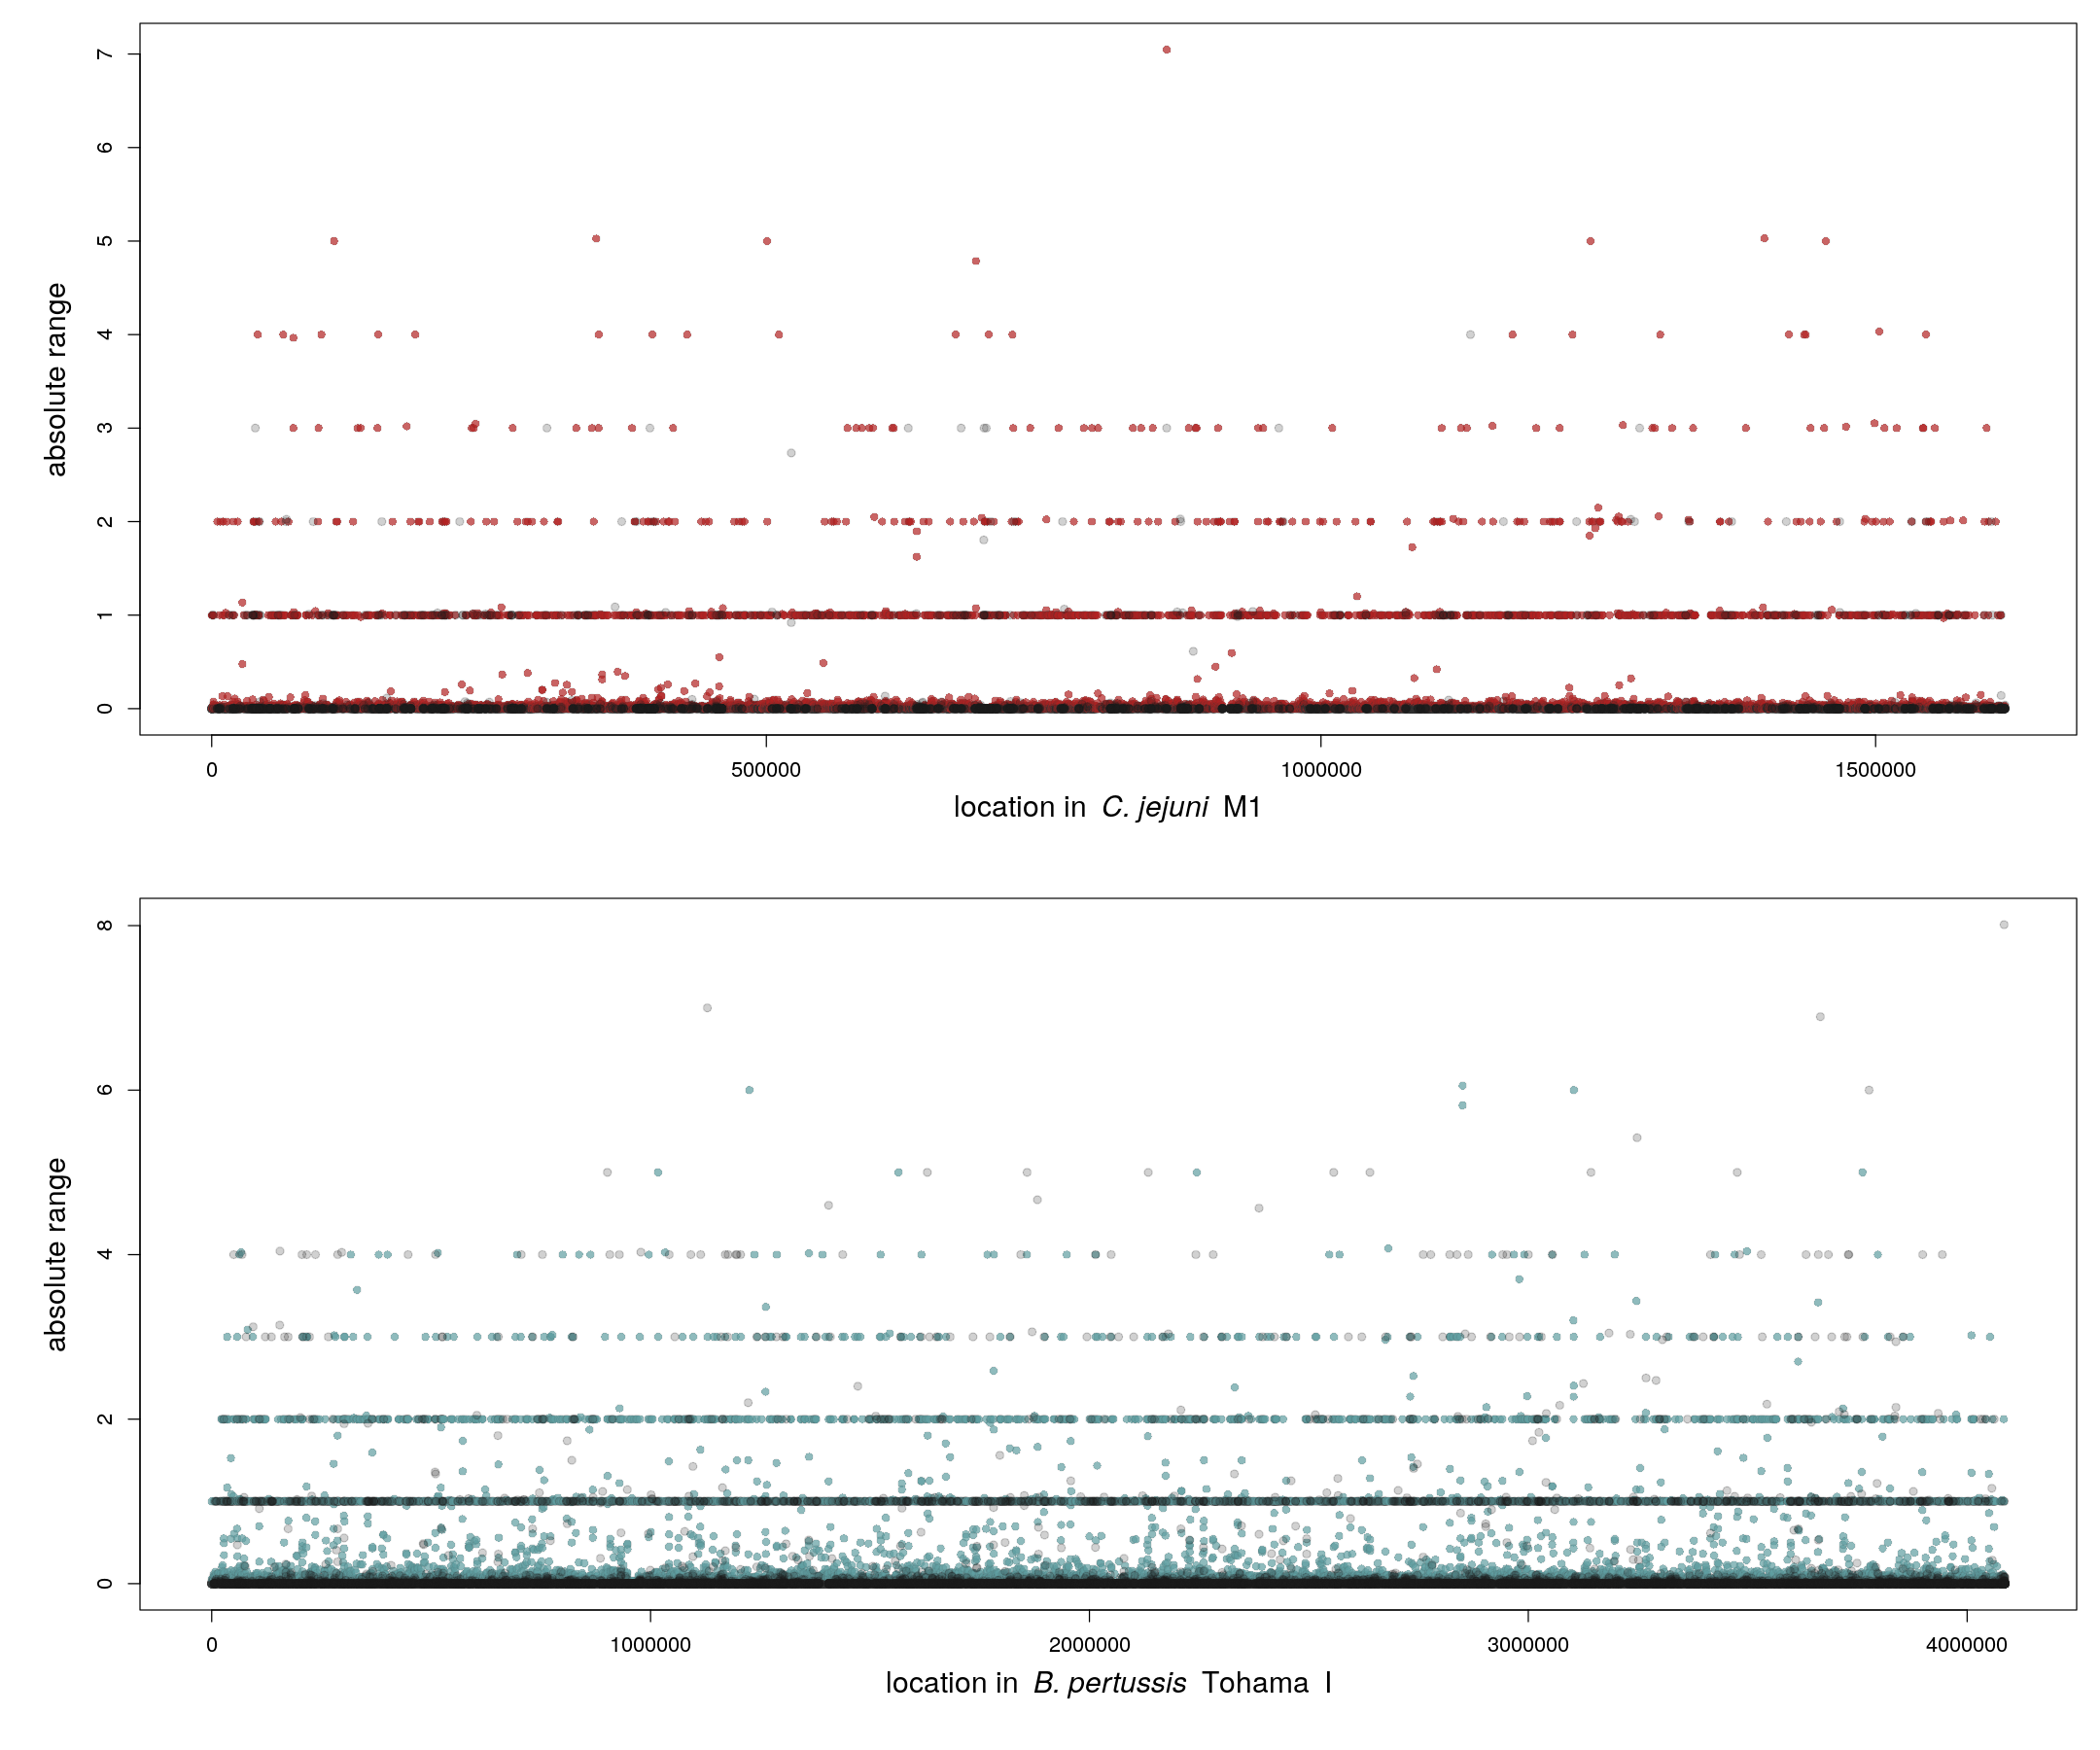

In [13]:
options(repr.plot.width=18, repr.plot.height=15)
par (cex=1.2, col.main="gray10", cex.axis=1.1, cex.lab=1.5, font=2, mar=c(6,6,1,1));
layout(matrix(1:2,ncol=1,nrow=2, byrow=F));
this_gray = rgb(0.2,0.2,0.2,0.1)
this_nonann = rgb(0.1,0.1,0.1,0.2)
this_cex = 0.9


x1<-read.table("2103.outdir_campylobacter/selected_tracts_annotated.csv", header=T)
x2<-read.table("2103.outdir_campylobacter/selected_tracts_unknown.csv", header=T)
x_lim = c(min(x1$location,x2$location),max(x1$location,x2$location))
y_lim = c(min(x1$rd_avge_tract_length,x2$rd_avge_tract_length), max(x1$rd_avge_tract_length,x2$rd_avge_tract_length))

plot (x1$location, x1$rd_avge_tract_length, ylim=y_lim, xlim=x_lim, xlab = expression("location in"~italic("C. jejuni")~M1), ylab="absolute range", 
     pch=21, bg=alpha("firebrick", 0.7), col=this_gray, cex=this_cex)
points (x2$location, x2$rd_avge_tract_length, pch=21, bg=this_nonann, col=this_nonann, cex=this_cex)

x1<-read.table("2103.outdir_bordetella/selected_tracts_annotated.csv", header=T)
x2<-read.table("2103.outdir_bordetella/selected_tracts_unknown.csv", header=T)
x_lim = c(min(x1$location,x2$location),max(x1$location,x2$location))
y_lim = c(min(x1$rd_avge_tract_length,x2$rd_avge_tract_length), max(x1$rd_avge_tract_length,x2$rd_avge_tract_length))

plot (x1$location, x1$rd_avge_tract_length, ylim=y_lim, xlim=x_lim, xlab = expression("location in"~italic("B. pertussis")~Tohama~I), ylab="absolute range", 
     pch=21, bg=alpha("cadetblue", 0.7), col=this_gray, cex=this_cex)
points (x2$location, x2$rd_avge_tract_length, pch=21, bg=this_nonann, col=this_nonann, cex=this_cex)

In [14]:
in_gene <- (as.numeric(colnames(calen)) > 1268323) & (as.numeric(colnames(calen)) < 1269717)
list_of_samples <- c("51-40", "11168_R1","H5_P2_R1", "17-19", "5-45", "38-14", "17-14", "17-34", "17-38", "17-49", "43-4", "C_jejuni_M1cam_R88", "22-12", 
                     "H5_P2_R2", "H5_P4_R1", "50-1", "H2_P1_R1", "62-5", "reference NC_017280.1", "81116_H1", "81116_R1", 
                     "81-176_KR", "81-176_R2", "C_jejuni_M1cam_R10") 
rownames(calen)
in_sample <- as.logical(lapply(rownames(calen), function(x){x %in% list_of_samples}))
x <- calen[in_sample, in_gene]

reference              ERR1701018              ERR1701019 
"reference NC_017280.1"     "C_jejuni_M1cam_R1"     "C_jejuni_M1cam_R2" 
             ERR1701020              ERR1701021              ERR1701022 
    "C_jejuni_M1cam_R3"     "C_jejuni_M1cam_R4"     "C_jejuni_M1cam_R5" 
             ERR1701023              ERR1701024              ERR1701027 
    "C_jejuni_M1cam_R6"     "C_jejuni_M1cam_R7"    "C_jejuni_M1cam_R10" 
             ERR1701038              ERR1701047              ERR1701057 
   "C_jejuni_M1cam_R21"    "C_jejuni_M1cam_R30"    "C_jejuni_M1cam_R40" 
             ERR1701067              ERR1701068              ERR1701077 
   "C_jejuni_M1cam_R50"    "C_jejuni_M1cam_R51"    "C_jejuni_M1cam_R60" 
             ERR1701087              ERR1701099              ERR1701105 
   "C_jejuni_M1cam_R70"    "C_jejuni_M1cam_R82"    "C_jejuni_M1cam_R88" 
             ERR1701117              ERR1701118              ERR1701127 
  "C_jejuni_M1cam_R100"   "C_jejuni_M1cam_R101"   "C_jejuni_M1cam_R110" 
             ERR1701128               ERR213027               ERR213028 
  "C_jejuni_M1cam_R111"                    "WT"               "Δ0159 H" 
              ERR213029               ERR213030               ERR213036 
              "Δ0159 R"                   "6-1"                  "5-45" 
              ERR213038               ERR213039               ERR213040 
                "22-12"                 "38-14"                  "43-4" 
              ERR213041               ERR213047               ERR213048 
                 "62-5"                 "17-14"                 "17-19" 
              ERR213049               ERR213050               ERR213051 
                "17-34"                 "17-38"                 "17-48" 
              ERR213052               ERR213055               ERR213056 
                "17-49"                 "19-36"                  "50-1" 
              ERR213061               ERR213062               ERR213063 
                "50-10"                 "50-18"                 "50-19" 
              ERR213068               ERR213069               ERR213070 
                "51-31"                 "51-35"                 "51-39" 
              ERR213071               ERR213072               ERR213073 
                "51-40"                 "51-41"                 "51-43" 
              ERR213080               ERR213093               ERR213094 
                "53-23"                 "54-40"                 "54-43" 
              ERR213110               ERR213112               ERR213113 
                "55-49"                 "57-23"                 "57-29" 
              ERR213114               ERR213115               ERR213116 
                "57-32"                 "57-33"                 "57-34" 
              ERR213117               ERR213118               ERR213119 
                "57-36"                 "57-37"                 "57-38" 
              ERR213120               ERR213121               ERR213122 
                "57-39"                 "57-40"                 "57-41" 
              ERR417423               ERR417424               ERR417425 
                   "R1"                    "H1"                    "R2" 
              ERR417426               ERR417427               ERR417428 
                   "R3"                    "R4"                    "H2" 
              ERR417429               ERR417430               ERR467046 
                   "H3"                    "H4"              "81116_H1" 
              ERR467047               ERR467048               ERR467049 
             "81116_R1"              "81116_R2"              "81116_H2" 
              ERR467050               ERR467051               ERR467052 
             "81116_R3"              "81116_H3"             "81-176_KR" 
              ERR467053               ERR467054               ERR467055 
            "81-176_H1"             "81-176_R2"             "81-176_H2" 
              ERR467056               ERR467057               ERR467058 

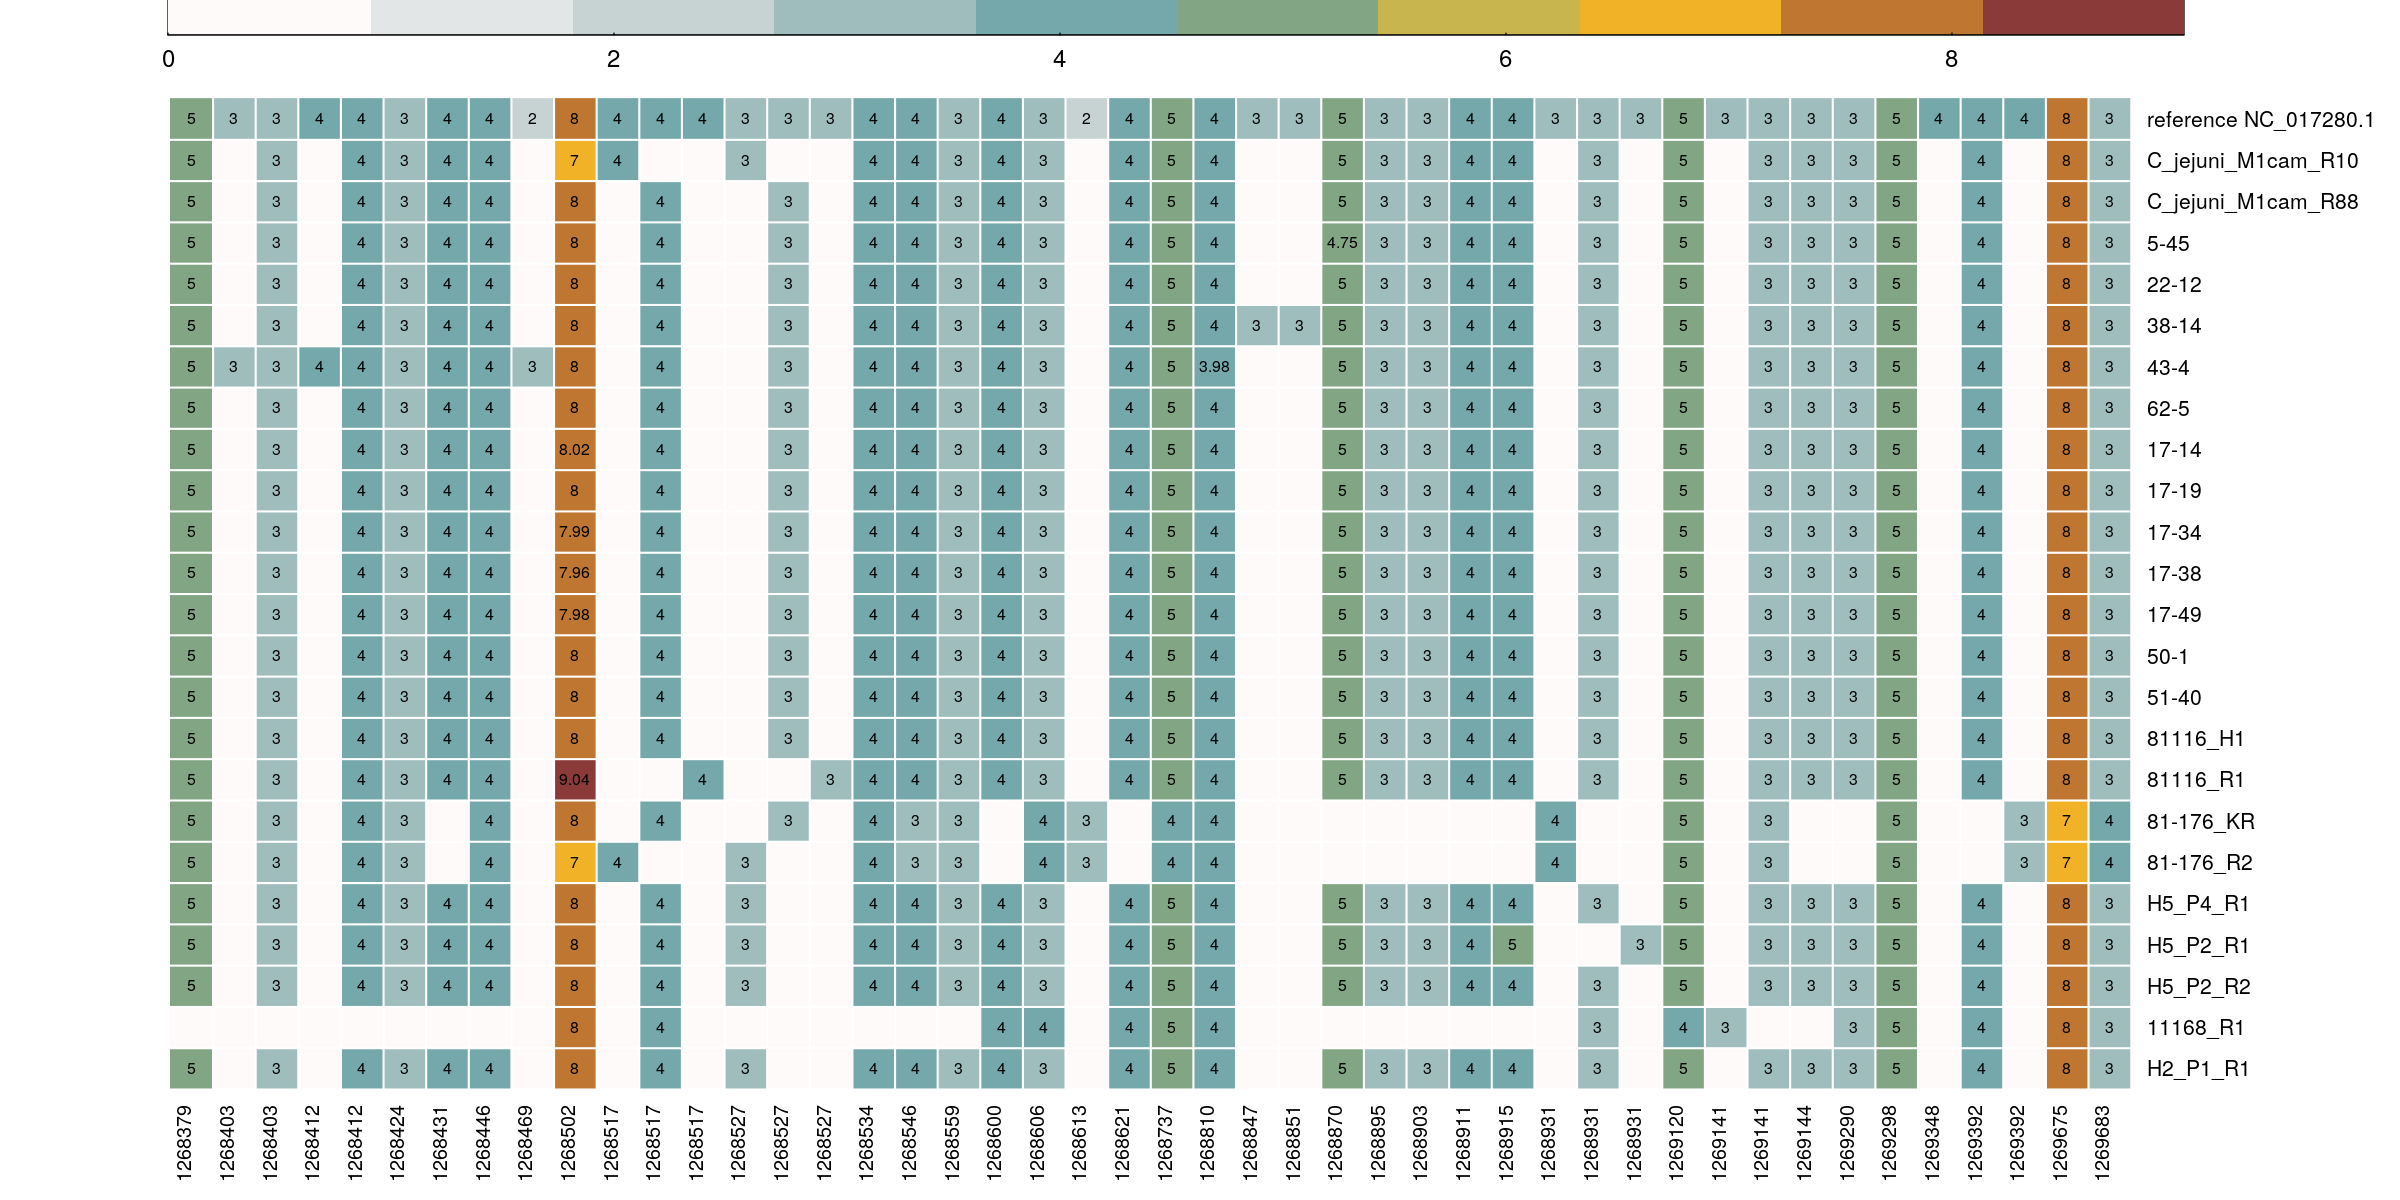

In [15]:
options(repr.plot.width=20, repr.plot.height=10)
par(oma=c(2,0,0,12))

#coul <- colorRampPalette(brewer.pal(9, "YlOrBr"))(12)[2:12]
coul <- colorRampPalette(c("snow", "azure3", "cadetblue", "goldenrod1", "indianred4"))(10)

x2 <- ifelse (x < 0.1, "", round(x,2))
heatmap.2 (x, scale="none", col= coul, # do not rescale (standardise) values
           cexRow=1.6, cexCol=1.5, # column text size
           rowsep=1:110, colsep=1:450,  sepwidth=c(0.02, 0.02),
           Colv=FALSE, Rowv = FALSE, dendrogram = "none", 
           cellnote = x2, notecex=1.2, notecol="black",  ## numbers inside cells
           tracecol=NA,  # remove vertical lines
           lmat = rbind( c(0,4), c(0, 3), c(2,1) ), lhei=c(1, 0.1, 12), lwid=c(1,12),  # proportions of width and height
           key=TRUE, keysize=0.2, key.ylab=NA, key.xlab=NA, symkey=FALSE, symbreaks=FALSE, key.title = NA, density.info="none",
           key.par=list(cex.axis=1.6, tcl=0.1, mar=c(3,0,0,0))
           )    # remove color histogram from top left corner

In [17]:
article_idx <- read.csv("2103.outdir_bordetella/1471-2164-8-122-S3_pertussis.csv", header=T)$Start
is_it_close <- function (x) {
    y <- sort (abs(as.numeric(x)-article_idx))[1]
    if ( y < 50) {
        #print(paste(x,y)); 
        return (TRUE);
    }
    return (FALSE);
}

new_bolen <- bolen[,bolen["reference NC_002929.2 pertussis_Tohama_I",]>4]  ## only big HT
in_gene <- as.logical(lapply(colnames(new_bolen), is_it_close))
#rownames(new_bolen)
#in_gene <- (as.numeric(colnames(calen)) > 1268323) & (as.numeric(colnames(calen)) < 1269717)
list_of_samples <- c("reference NC_002929.2 pertussis_Tohama_I", "ERR4176311_PRJEB38438_pertussis",
                     "ERR5101986_PRJEB42353_pertussis",  "ERR5102167_PRJEB42353_pertussis","ERR5102046_PRJEB42353_pertussis",
                     "SRR4422986_PRJNA348407_pertussis", "SRR4423004_PRJNA348407_pertussis",
                     "SRR5080672_PRJNA356412_pertussis", "SRR5080683_PRJNA356412_pertussis",
                    "SRR10258084_bronchiseptica_I943", "SRR10258119_bronchiseptica_E001", "SRR10258086_bronchiseptica_I328", 
                     "SRR10253892_parapertussis_J293", "SRR10253890_parapertussis_J307") 

in_sample <- as.logical(lapply(rownames(new_bolen), function(x){x %in% list_of_samples}))
x <- new_bolen[in_sample, in_gene]
x <- x[match(list_of_samples,rownames(x)),]

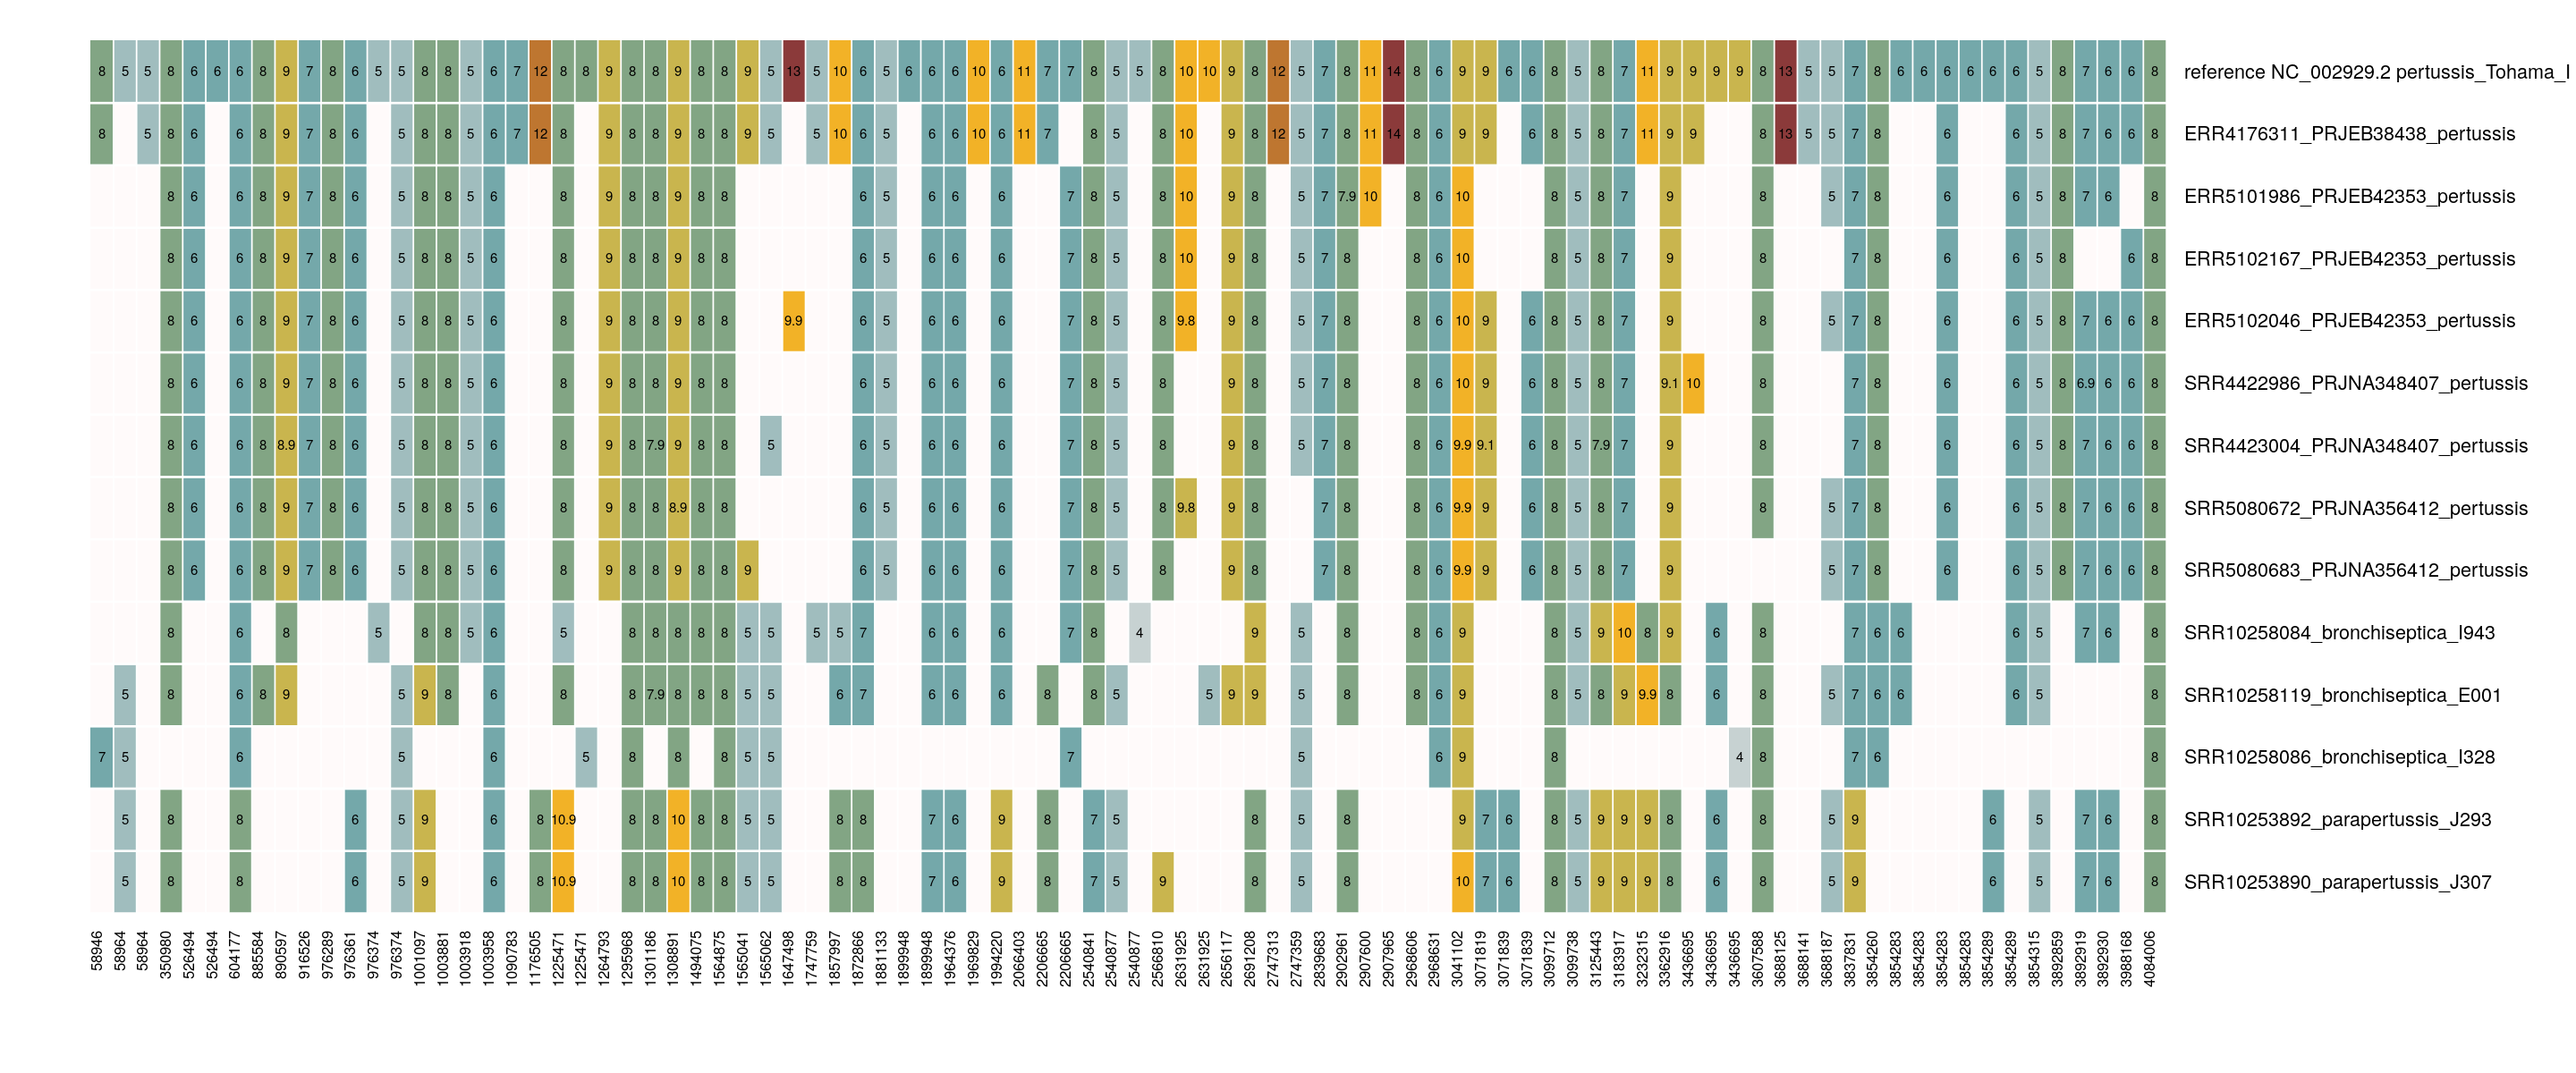

In [18]:
options(repr.plot.width=24, repr.plot.height=10)
par(oma=c(4,0,0,18))

x2 <- ifelse (x < 0.1, "", round(x,1))
heatmap.2 (x, scale="none", col= coul, # do not rescale (standardise) values
           cexRow=1.3, cexCol=1, # column text size
           rowsep=1:110, colsep=1:450,  sepwidth=c(0.02, 0.02),
           Colv=FALSE, Rowv = FALSE, dendrogram = "none", 
           cellnote = x2, notecex=0.9, notecol="black",  ## numbers inside cells
           lhei=c(1, 24), lwid=c(1,24),  # proportions of width and height
           tracecol=NA,  # remove vertical lines
           key=FALSE
           )    # remove color histogram from top left corner

In [19]:
#sum(bolen["reference NC_002929.2 pertussis_Tohama_I",]>7)
list_of_samples <- c("51-40", "11168_R1","H5_P2_R1", "17-19", "5-45", "38-14", "17-14", "17-34", "17-38", "17-48", "43-4", "C_jejuni_M1cam_R88", "22-12", 
                     "H5_P2_R2", "H5_P4_R1", "50-1", "H2_P1_R1", "62-5", "reference NC_017280.1", "81116_H1", "81116_R1", 
                     "81-176_KR", "81-176_R2", "C_jejuni_M1cam_R10") 
in_sample <- as.logical(lapply(rownames(calen), function(x){x %in% list_of_samples}))
## following changes are not homopolymer tracts: 1269447 1268939 
camp_idx = c(1269149,1268944,1268899,1268857,1268827,1268739,1268531,1268425,846319,846256,846075,846037,846702)
is_it_close <- function (x) {
    y <- sort (abs(camp_idx - as.numeric(x) - 29))[1]  ## colnames == camp_idx - 29 (since we have a 29-mer)
    if ( y < 12) {
        #print(paste(x,y)); 
        return (TRUE);
    }
    return (FALSE);
}
print (sort(camp_idx - 29))
print (sort(camp_idx))
in_gene <- as.logical(lapply(colnames(calen), is_it_close))
x <- calen[in_sample, in_gene]

 [1]  846008  846046  846227  846290  846673 1268396 1268502 1268710 1268798
[10] 1268828 1268870 1268915 1269120
 [1]  846037  846075  846256  846319  846702 1268425 1268531 1268739 1268827
[10] 1268857 1268899 1268944 1269149


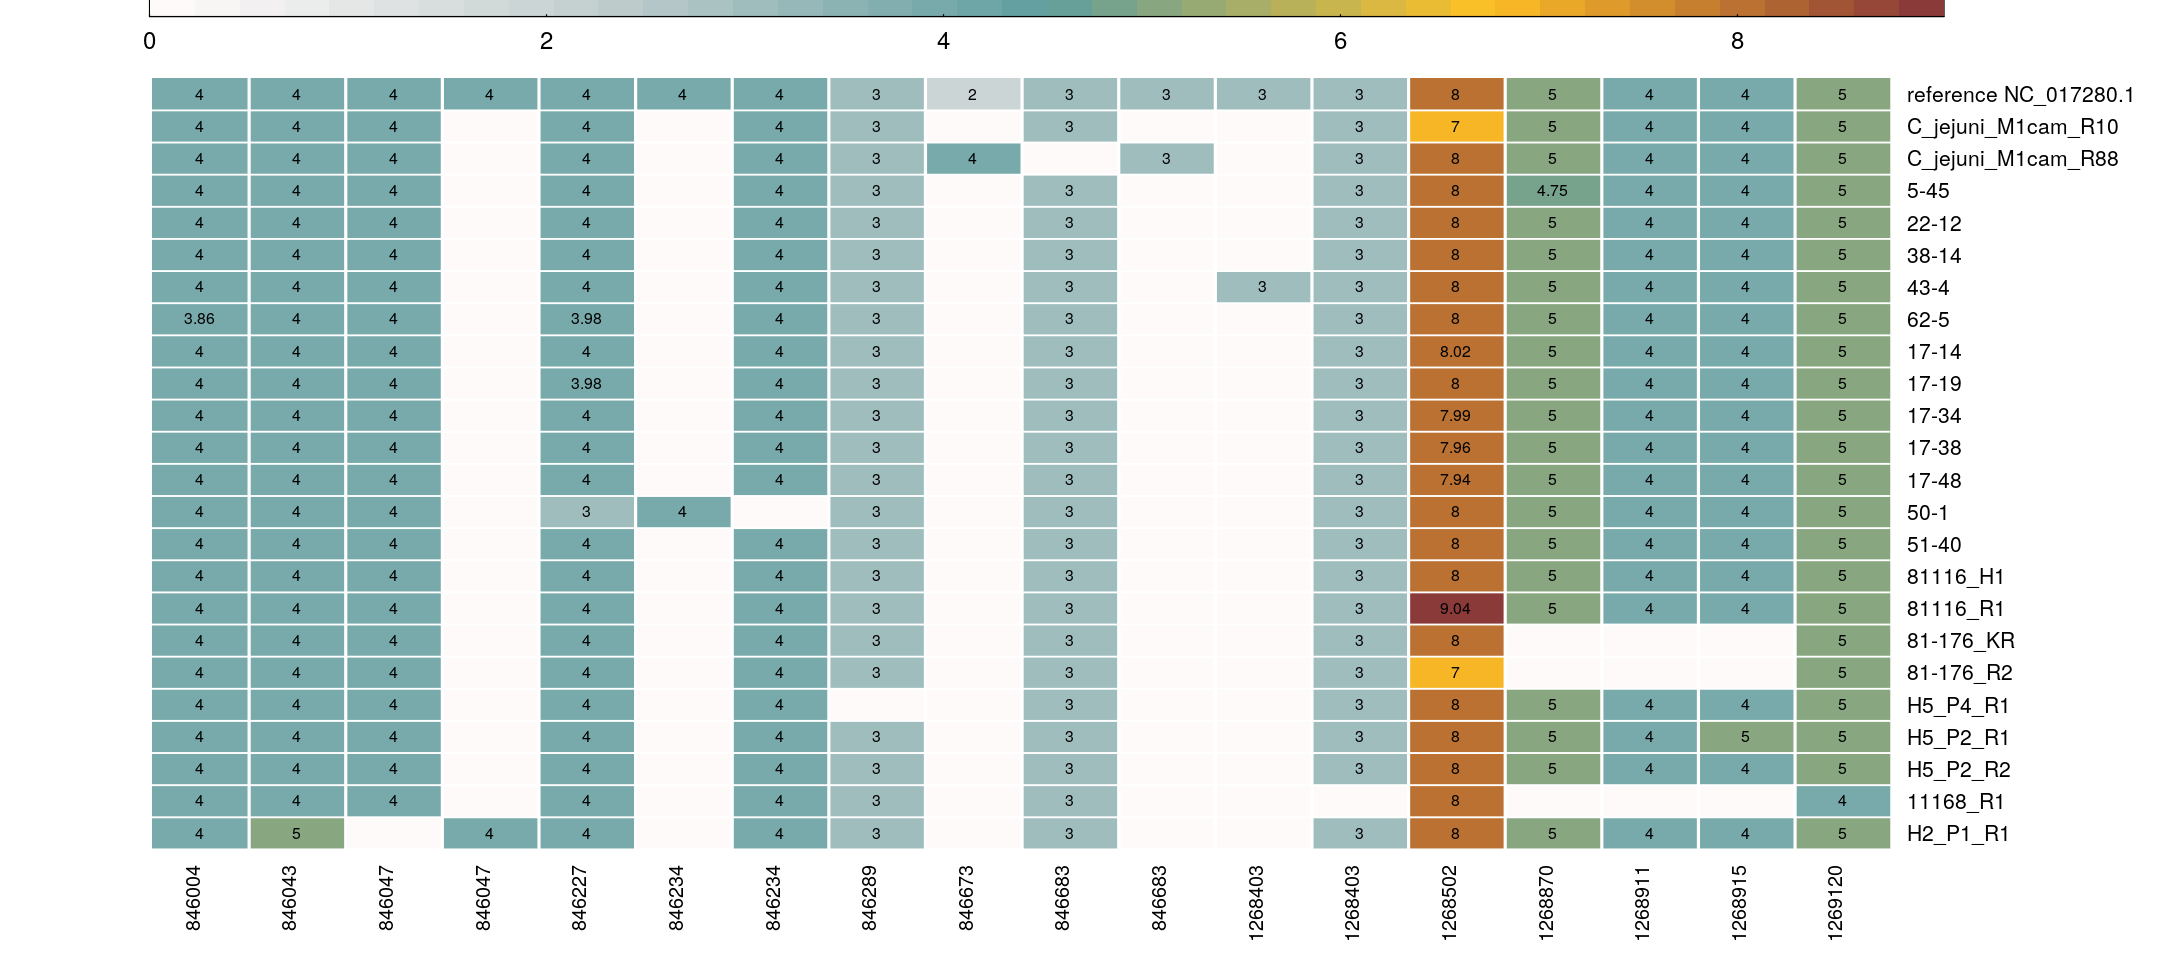

In [20]:
options(repr.plot.width=18, repr.plot.height=8)
par(oma=c(2,0,0,12))

#coul <- colorRampPalette(brewer.pal(9, "YlOrBr"))(12)[2:12]
coul <- colorRampPalette(c("snow", "azure3", "cadetblue", "goldenrod1", "indianred4"))(40)

x2 <- ifelse (x < 0.1, "", round(x,2))
heatmap.2 (x, scale="none", col= coul, # do not rescale (standardise) values
           cexRow=1.6, cexCol=1.5, # column text size
           rowsep=1:110, colsep=1:450,  sepwidth=c(0.02, 0.02),
           Colv=FALSE, Rowv = FALSE, dendrogram = "none", 
           cellnote = x2, notecex=1.2, notecol="black",  ## numbers inside cells
           tracecol=NA,  # remove vertical lines
           lmat = rbind( c(0,4), c(0, 3), c(2,1) ), lhei=c(1, 0.1, 12), lwid=c(1,12),  # proportions of width and height
           key=TRUE, keysize=0.2, key.ylab=NA, key.xlab=NA, symkey=FALSE, symbreaks=FALSE, key.title = NA, density.info="none",
           key.par=list(cex.axis=1.6, tcl=0.1, mar=c(3,0,0,0))
           )    # remove color histogram from top left corner